<a href="https://colab.research.google.com/github/HagarHassan11/CNN-Architectures/blob/main/LeNet_5_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from IPython.display import Image, display
import seaborn as sns
from tensorflow.keras.datasets import cifar100

# **1- Load cifar100 dataset from keras**

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 10s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

# **2- Use any needed pre-processing function to analyze dataset**

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = tf.image.resize(X_train, (32, 32))
X_test = tf.image.resize(X_test, (32, 32))

# **3- Use LeNet-5 to complete the process of classification**


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 3.9390 - accuracy: 0.0974 - val_loss: 3.5383 - val_accuracy: 0.1662
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 3.3996 - accuracy: 0.1854 - val_loss: 3.3551 - val_accuracy: 0.1903
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 3.1878 - accuracy: 0.2241 - val_loss: 3.1948 - val_accuracy: 0.2214
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 3.0380 - accuracy: 0.2546 - val_loss: 3.0481 - val_accuracy: 0.2522
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 2.9292 - accuracy: 0.2743 - val_loss: 2.9850 - val_accuracy: 0.2719
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 2.8406 - accuracy: 0.2903 - val_loss: 2.9494 - val_accuracy: 0.2778
Epoch 7/10
1563/1563 [==============================] - 40s 25ms/step - loss: 2.7626 - accuracy: 0.3055 - val_loss: 2.9853 -

## **4- Print LeNet-5 architecture**

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

## **5- Print number of Trainable parameters in each layer**

In [ ]:
for layer in model.layers:
    print(layer.name, layer.trainable, layer.count_params())

conv2d_8 True 456
max_pooling2d_8 True 0
conv2d_9 True 2416
max_pooling2d_9 True 0
flatten_4 True 0
dense_12 True 48120
dense_13 True 10164
dense_14 True 8500


# **6- Print confusion matrix relative to testing samples**

313/313 [==============================] - 2s 7ms/step


Text(95.72222222222221, 0.5, 'Truth')

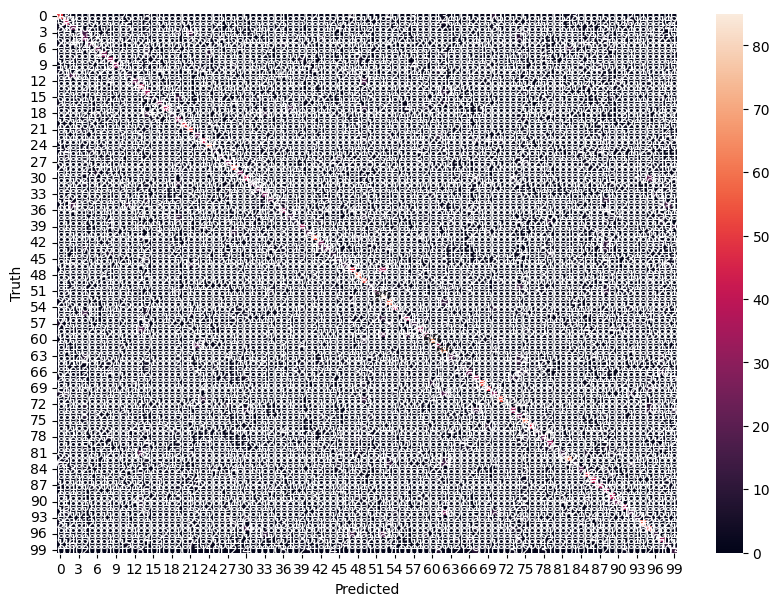

In [ ]:
y_pred = model.predict(X_test)
y_labels=[np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_labels)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **7- Print precision, recall, f1_score**

In [ ]:
report= classification_report(y_test, y_labels,zero_division=1)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50       100
           1       0.30      0.39      0.34       100
           2       0.18      0.21      0.20       100
           3       0.11      0.03      0.05       100
           4       0.12      0.22      0.15       100
           5       0.24      0.16      0.19       100
           6       0.27      0.21      0.23       100
           7       0.33      0.27      0.30       100
           8       0.27      0.32      0.29       100
           9       0.69      0.29      0.41       100
          10       0.09      0.05      0.06       100
          11       0.16      0.11      0.13       100
          12       0.44      0.22      0.29       100
          13       0.18      0.41      0.25       100
          14       0.14      0.32      0.20       100
          15       0.25      0.07      0.11       100
          16       0.36      0.25      0.29       100
    